In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Resume_Dataset.csv")

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.shape

(962, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


# Exploring Category

In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

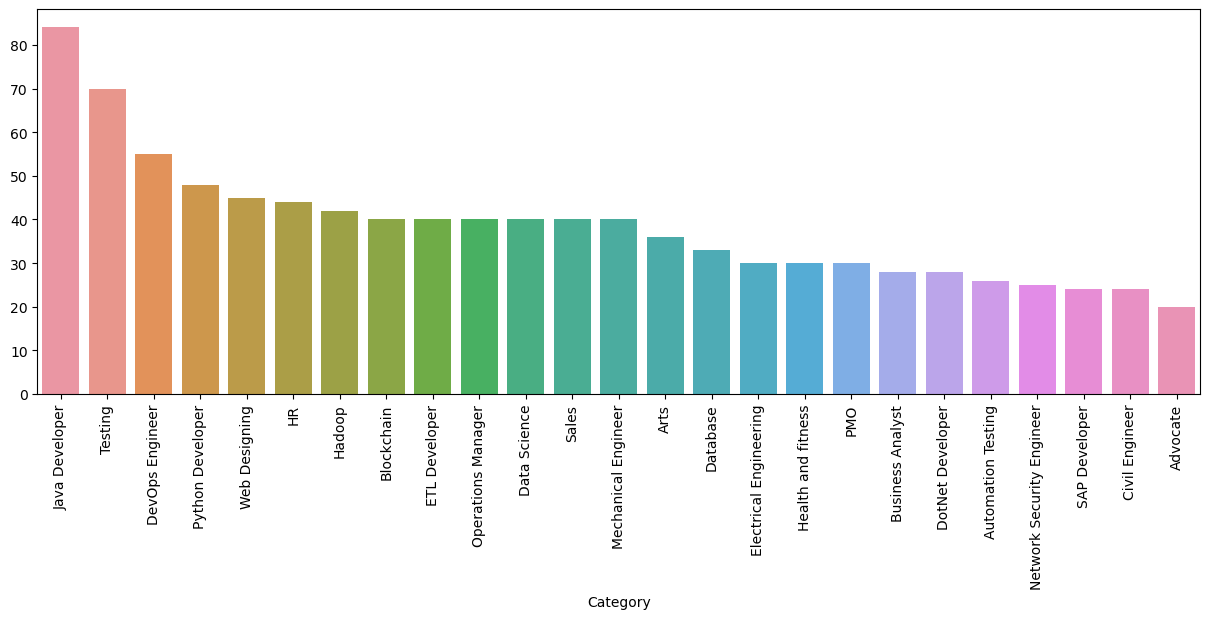

In [8]:
plt.figure(figsize = (15,5))
sns.barplot(x = df['Category'].value_counts().keys(), y = df['Category'].value_counts().values)
plt.xticks(rotation = 90)
plt.show()

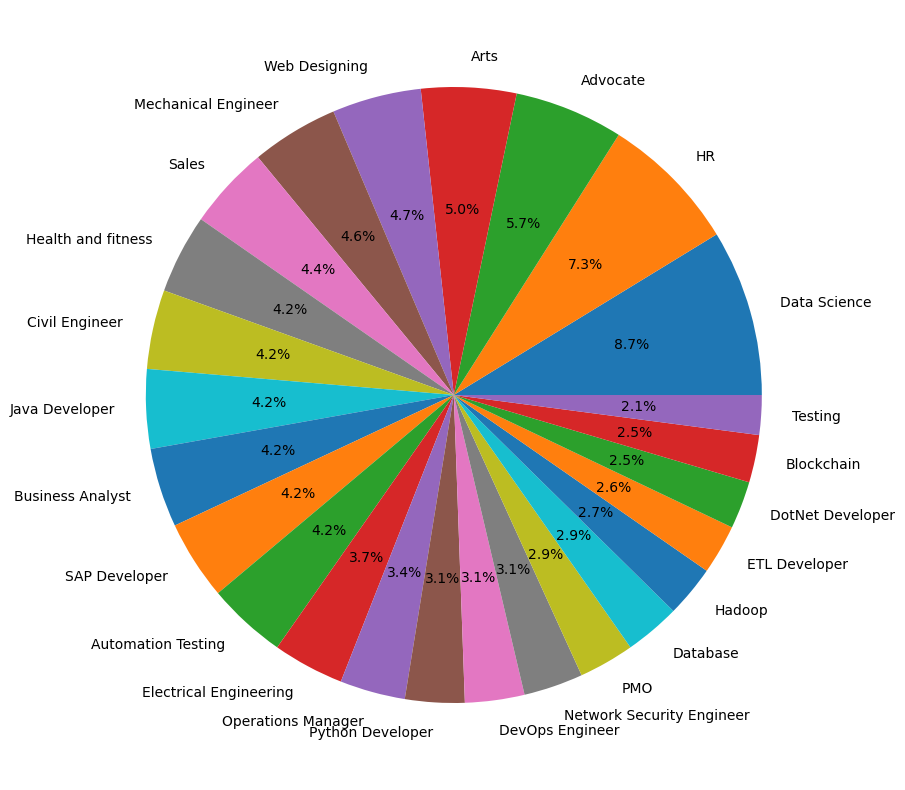

In [9]:
count = df['Category'].value_counts()
label = df['Category'].unique()
plt.figure(figsize = (15,10))
plt.pie(count, labels = label, autopct = '%1.1f%%')
plt.show()

# Exploring Resume

In [10]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [11]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [12]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [13]:
df['Category'][0]

'Data Science'

# Cleaning the Test data

1. URL's
2. Hashtags
3. Mentions
4. Special letters
5. Punctuations

In [14]:
import re

In [15]:
def clean_resume(txt):
    clean_txt = re.sub('http\S+\s', ' ', txt)
    clean_txt = re.sub('RT|cc', ' ', clean_txt)
    clean_txt = re.sub('#\S+\s', ' ', clean_txt)
    clean_txt = re.sub('@\S+', '  ', clean_txt)  
    clean_txt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_txt)
    clean_txt = re.sub(r'[^\x00-\x7f]', ' ', clean_txt) 
    clean_txt = re.sub('\s+', ' ', clean_txt)
    return clean_txt

In [16]:
df['Resume'] = df['Resume'].apply(lambda x: clean_resume(x))

In [17]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# Now this time to our category data convert into labeled(Numerical form) data because machine learning algo does not use text data to make model.  

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [20]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vectorization (text into number form)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(stop_words='english')

tfidfv.fit(df['Resume'])
requredText  = tfidfv.transform(df['Resume'])

In [22]:
list(requredText)

[<1x7351 sparse matrix of type '<class 'numpy.float64'>'
 	with 315 stored elements in Compressed Sparse Row format>,
 <1x7351 sparse matrix of type '<class 'numpy.float64'>'
 	with 89 stored elements in Compressed Sparse Row format>,
 <1x7351 sparse matrix of type '<class 'numpy.float64'>'
 	with 132 stored elements in Compressed Sparse Row format>,
 <1x7351 sparse matrix of type '<class 'numpy.float64'>'
 	with 334 stored elements in Compressed Sparse Row format>,
 <1x7351 sparse matrix of type '<class 'numpy.float64'>'
 	with 24 stored elements in Compressed Sparse Row format>,
 <1x7351 sparse matrix of type '<class 'numpy.float64'>'
 	with 48 stored elements in Compressed Sparse Row format>,
 <1x7351 sparse matrix of type '<class 'numpy.float64'>'
 	with 104 stored elements in Compressed Sparse Row format>,
 <1x7351 sparse matrix of type '<class 'numpy.float64'>'
 	with 300 stored elements in Compressed Sparse Row format>,
 <1x7351 sparse matrix of type '<class 'numpy.float64'>'
 	

# Splitting

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requredText, df['Category'], test_size=0.2, random_state=42)

In [25]:
X_train.shape

(769, 7351)

In [26]:
X_test.shape

(193, 7351)

# Model Selection

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [28]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [29]:
print(accuracy_score(y_test, y_pred))

0.9844559585492227


In [30]:
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [36]:
import pickle
pickle.dump(tfidfv,open('tfidfv.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [37]:
my_resume = """Ayush Ranjan Soni                                                                Email: ars7408984015@gmail.com
(Data Analyst)                                     LinkedIn: https://www.linkedin.com/in/ayush-ranjan-soni-0ba31314b
Address: Munirka New Delhi, India                                           GitHub: https://github.com/AyushRanjanSoni
Phone: 6387063087                        
Summary: 
Exceptional data scientist with experience turning raw data from multiple sources into valuable insights and creative solutions. Ability to translate vast amounts of data into meaningful findings that influence business strategy. Solid background in computer science and analytics. Compelling presentation and reporting skills.
Experience:
Data Analyst – GYPR Pvt. Ltd. (Present)
Developing and executing Python, SQL, and statistics assignments, fostering a global community of learners and enabling students from prestigious universities, including Trine University, to excel in their coursework.
Creating data visualisations and interactive dashboards using Tableau and PowerBI, enhancing the learning environment for students enrolled in various US universities and institutions like Stanford University, Lake Michigan College, Pace University, and Stevens University.
I am collaborating with a multidisciplinary team to design and implement machine learning projects, empowering students from across the globe with cutting-edge skills and knowledge.
Applied analysis skills, leveraging insights, developing and deploying data models, and evaluating and improving existing models to create solutions.
Embraced the company's ethos of "developing together" by continuously expanding skills and knowledge in Python, SQL, statistics, RDBMS, Tableau, PowerBI, Excel, and machine learning, ensuring our educational offerings remain at the forefront.
Data Analytics Intern – Mentored Minds (July 2023 to Oct 2023)
Performed automation, data manipulation, and reporting tasks using SQL, MS Excel, Python, and Tableau.
Identified issues, analyzed information, and provided solutions to problems.
Education:
Bachelor of Vocation (Software Development & E-Governance), National P.G. College - 2020 (Graduated).
Intermediate(12th), D.A.V public school TTPP, Ambedkar Nagar (2017)
High school(10th), D.A.V public school TTPP, Ambedkar Nagar (2015)
Additional Qualifications:
Data Science at Relevel by Unacademy (March 2022 to Feb 2023).
Machine Learning with Python Expert at Decodr Technologies New Delhi (Sep 2020 - Feb 2021).
Internship in J2EE (Java 2 Enterprise Edition) at NIELIT Lucknow (June 2019 - July 2019).

Projects:
Apartment Price Prediction Project: Utilized Linear Regression algorithm to predict flat prices based on bedrooms (BHK), room size, and other factors using the "Bangalore House Price Prediction" dataset. Employed Mean Square Error for error checking.
Border Gavaskar Trophy Analysis: Analyzed the cricket tournament between India and Australia, focusing on descriptive and comparative analysis. Calculated summary statistics and created visualizations for insights.
E-commerce Delivery Charges Project: Analyzed delivery charges for different products by a courier company for an E-commerce company. Identified undercharged, appropriately charged, or overcharged products based on estimates provided.
Skills:
Advanced MS-Excel
Structured Query Language (SQL)
Power BI
Tableau Desktop
Statistics and Probability
Python (Numpy, Pandas, Matplotlib, Seaborn, Sklearn, NLTK, etc.)
Machine Learning (Regression, Classification, and Cluster)
Time Series Analysis
Accomplishments:
Certificate in Resume Project Challenge from Code Basics in 2023.
Certificate in Dream11's Data Analyst-SQL Hiring Challenge organized by Shine.com secured 163rd rank.
Successfully cleared the SQL assessment from Hacker Rank in 2023.
LANGUAGES:
Hindi and English
"""

In [38]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = clean_resume(my_resume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidfv.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
